### Universidade Federal do Rio Grande - FURG

### Escola de Engenharia - EE

### Programa de Pós-graduação em Engenharia Oceânica - PPGEO

### Disciplina: Confiabilidade em Engenharia

### Professor: Dr. Mauro de Vasconcellos Real

# __Exemplos adicionais__

In [12]:
import numpy as np
from scipy.stats import norm

# __Capítulo 3 - Modelos analíticos para fenômenos aleatórios__

## __Exemplo A.3.1__ 

### A.3.1 - Distribuição normal de probabilidade 

Um cabo de aço deve suportar uma força de tração axial $P$ igual a $100 kN$. Do processo de fabricação destes cabos, sabe-se que a resistência média dos cabos vale $\mu_P = 250 kN$ e que o desvio padrão da resistência é $\sigma_P = 50 kN$. Determinar:
* a) A probabilidade de falha do cabo ao suportar uma carga de $100 kN$;
* b) A probabilidade de o cabo suportar uma carga superior a $300 kN$.

#### Solução:

a) A probabilidade de que $P$ seja menor que $100 kN$ é dada por:

* Variável normal padronizada: 

$$z = \frac{p - \mu_P}{\sigma_P} = \frac{100 - 250}{50} = -3.00 $$

$$P(P \leq 100 kN) = \Phi(-3.00) = 0.0013 = 0.13\%$$

In [13]:
prob = norm.cdf(-3.00)
print("P(P <= 100 kN) = {0:.4f}".format(prob))

P(P <= 100 kN) = 0.0013


b) $P(P \gt 300 kN) = 1.00 - P(P \leq 300 kN)$

* Variável normal padronizada: 

$$z = \frac{p - \mu_P}{\sigma_P} = \frac{300 - 250}{50} = 1.00 $$

$$P(P \leq 300 kN) = \Phi(1.00) = 0.8413 = 84.13\%$$

$$P(P \gt 300 kN) =  1.00 - \Phi(1.00) = 0.1587 = 15.87\%$$



In [14]:
prob1 = norm.cdf(1.00)
prob2 = 1.00 - prob1
print("P(P <= 300 kN) = {0:.4f}".format(prob1))
print("P(P > 300 kN) = {0:.4f}".format(prob2))


P(P <= 300 kN) = 0.8413
P(P > 300 kN) = 0.1587


### A.3.2 - Distribuição lognormal  de probabilidade 

Resolver o exemplo A.3.1, usando uma distribuição lognormal de probabilidade.

#### Solução:

Parâmetros da distribuição lognormal:

$$ \delta_P = \frac{\sigma_P}{\mu_P}$$

$$ \zeta_P = \sqrt{\ln(1+\delta_P^2)}$$

$$ \lambda_P = \ln(\mu_P) - \frac{1}{2}\zeta_P^2 $$

In [21]:
mu_P = 250.00
sigma_P = 50.00
delta_P = sigma_P / mu_P
zeta_P = np.sqrt(np.log(1.00 + delta_P ** 2))
lambda_P = np.log(mu_P) - 1/2 * zeta_P ** 2
print("delta_P = {0:.4f}".format(delta_P))
print("zeta_P = {0:.4f}".format(zeta_P))
print("lambda_P = {0:.4f}".format(lambda_P))


delta_P = 0.2000
zeta_P = 0.1980
lambda_P = 5.5019


a) Cálculo de $P(P <= 100 kN)$:

Variável normal padronizada:

$$ z = \frac{\ln(P) - \lambda_P}{\sigma_P}$$

$$ P(P <= 100 kN) = \Phi(z) $$


In [23]:
p = 100.00
z = (np.log(p) - mu_P)/sigma_P
prob = norm.cdf(z)
print("z = {0:.4f}".format(z))
print("P(P <= 100 kN) = {0:.4e}".format(prob))

z = -4.9079
P(P <= 100 kN) = 4.6029e-07


b) Cálculo de $P(P > 300 kN)$:

Variável normal padronizada:

$$ z = \frac{\ln(P) - \lambda_P}{\sigma_P}$$

$$ P(P <= 300 kN) = \Phi(z) $$

$$ P(P > 300 kN) = 1.00 - \Phi(z) $$



In [28]:
p = 300.00
z = (np.log(p) - lambda_P)/zeta_P
prob1 = norm.cdf(z)
prob2 = 1.00 - prob1
print("z = {0:.4f}".format(z))
print("P(P <= 300 kN) = {0:.4f}".format(prob1))
print("P(P > 300 kN) = {0:.4f}".format(prob2))

z = 1.0196
P(P <= 300 kN) = 0.8461
P(P > 300 kN) = 0.1539


### Gráficos

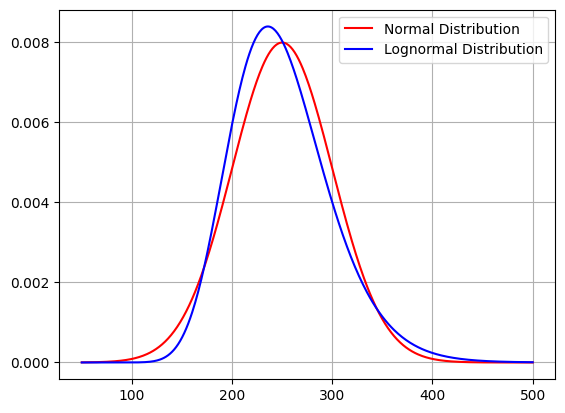

In [34]:
import matplotlib.pyplot as plt
from scipy.stats import lognorm

mu_P = 250.00
sigma_P = 50.00
delta_P = sigma_P / mu_P
zeta_P = np.sqrt(np.log(1.00 + delta_P ** 2))
lambda_P = np.log(mu_P) - 1/2 * zeta_P ** 2

p = np.linspace(50,500,450)
f1 = norm.pdf(p, 250.00, 50.00)
z = (np.log(p) - lambda_P)/zeta_P
f2 = lognorm.pdf(p, zeta_P, 0.00, np.exp(lambda_P))
plt.plot(p, f1, color="red", label="Normal Distribution")
plt.plot(p, f2, color="blue", label="Lognormal Distribution")
plt.grid()
plt.legend()
plt.show()




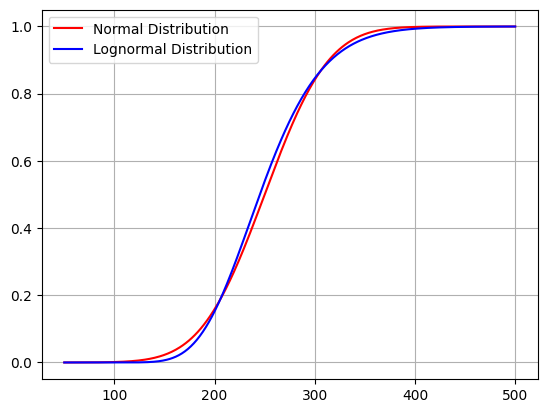

In [35]:
mu_P = 250.00
sigma_P = 50.00
delta_P = sigma_P / mu_P
zeta_P = np.sqrt(np.log(1.00 + delta_P ** 2))
lambda_P = np.log(mu_P) - 1/2 * zeta_P ** 2

p = np.linspace(50,500,450)
f1 = norm.cdf(p, 250.00, 50.00)
z = (np.log(p) - lambda_P)/zeta_P
f2 = lognorm.cdf(p, zeta_P, 0.00, np.exp(lambda_P))
plt.plot(p, f1, color="red", label="Normal Distribution")
plt.plot(p, f2, color="blue", label="Lognormal Distribution")
plt.grid()
plt.legend()
plt.show()

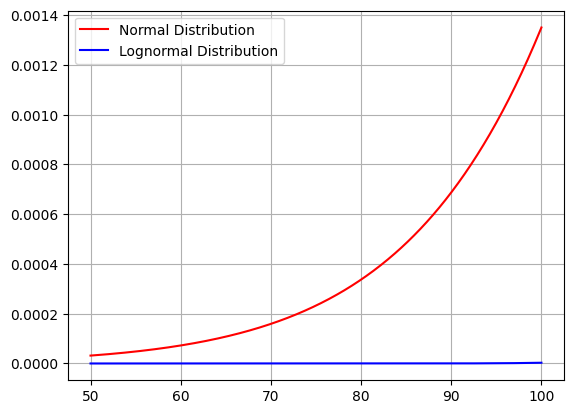

In [36]:
mu_P = 250.00
sigma_P = 50.00
delta_P = sigma_P / mu_P
zeta_P = np.sqrt(np.log(1.00 + delta_P ** 2))
lambda_P = np.log(mu_P) - 1/2 * zeta_P ** 2

p = np.linspace(50,100,500)
f1 = norm.cdf(p, 250.00, 50.00)
z = (np.log(p) - lambda_P)/zeta_P
f2 = lognorm.cdf(p, zeta_P, 0.00, np.exp(lambda_P))
plt.plot(p, f1, color="red", label="Normal Distribution")
plt.plot(p, f2, color="blue", label="Lognormal Distribution")
plt.grid()
plt.legend()
plt.show()